![NBA Logo](nba%20logo.png)

Downloaded from [Andscape](https://andscape.com/features/hall-of-fame-jerry-west-designer-alan-siegel-nba-logo/)

## Header with contribution
How NBA Player Performance and Roles Have Evolved Across Eras

CMSC320 - Summer 2025 Final Project Tutorial

Abubakr Hussien, Matt Hullana, Tanishq Ahuja

Contributions:

| Name     | Sections Contributed | Description                                                                                   |
|----------|----------------------|-----------------------------------------------------------------------------------------------|
| Abu      | B, C, F, G           | Preprocessed and cleaned data; conducted exploratory data analysis on NBA performance trends. |
| Matt     | A, C, D, E, F        | Some data prep for ML analysis; did ML analysis using 4 different techniques                  |
| Tanishq  | A, C, F                 | Helped come up with early questions; Did ANOVA test, did both plots for linear regression and k means clustering, wrote insights and conclusion.   |

## Introduction
Basketball has evolved dramatically over the decades, from pace and playstyle to player roles and physicality. In this project, we explore how NBA player performance and characteristics have shifted across generations, using a comprehensive dataset of all 5,313 players from 1947 to the present.

Our goal is to understand the relationship between era, physical attributes, and on-court performance, and to uncover trends that reflect how the game itself has changed. Specifically, we aim to answer:

Has scoring performance (PTS) changed significantly across NBA eras?

- Are physical attributes like height correlated with player success metrics such as Free Throw %, Player Efficiency Rating (PER), and Win Shares (WS)?

- Has the distribution of player positions (e.g., Guard, Forward, Center) evolved over time?

- Can we use machine learning models to predict player performance using features like height, weight, and debut year?

By combining exploratory data analysis, statistical hypothesis testing, and machine learning, this tutorial offers a multi-faceted view into the history and structure of NBA talent. Our insights can help fans, analysts, and aspiring data scientists better understand how the sport has transformed over nearly eight decades.

## Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, accuracy_score, classification_report
from scipy.stats import ttest_ind


## Data Curation
Our dataset was sourced from [Kaggle: NBA Player Stats Dataset](https://www.kaggle.com/datasets/flynn28/v2-nba-player-database), which includes career data for 5,313 NBA players from 1947 to the present. Each row represents a single player, with features including physical attributes (e.g., height, weight), career span (debut/final year), position(s), and advanced metrics like Points per Game (PTS), Assists (AST), Rebounds (TRB), Player Efficiency Rating (PER), and Win Shares (WS).

, which includes career data for 5,313 NBA players from 1947 to the present. Each row represents a single player, with features including physical attributes (e.g., height, weight), career span (debut/final year), position(s), and advanced metrics like Points per Game (PTS), Assists (AST), Rebounds (TRB), Player Efficiency Rating (PER), and Win Shares (WS).

In [ ]:
df = pd.read_csv("NBA_PLAYERS.csv")
df


,Name,Debut,Final,Position,Height,Weight,Birthday,School,HOF,Active,G,PTS,TRB,AST,FG%,FG3%,FT%,eFG%,PER,WS
0,Alaa Abdelnaby,1991,1995,"['Forward', 'Center']",82,240.0,"June 24, 1968",['Duke'],False,False,256,5.7,3.3,0.3,50.2,0.0,70.1,50.2,13.0,4.8
1,Zaid Abdul-Aziz,1969,1978,"['Center', 'Forward']",81,235.0,"April 7, 1946",['Iowa State'],False,False,505,9.0,8.0,1.2,42.8,NaN,72.8,NaN,15.1,17.5
2,Kareem Abdul-Jabbar,1970,1989,['Center'],86,225.0,"April 16, 1947",['UCLA'],True,False,1560,24.6,11.2,3.6,55.9,5.6,72.1,55.9,24.6,273.4
3,Mahmoud Abdul-Rauf,1991,2001,['Guard'],73,162.0,"March 9, 1969",['LSU'],False,False,586,14.6,1.9,3.5,44.2,35.4,90.5,47.2,15.4,25.2
4,Tariq Abdul-Wahad,1998,2003,['Forward'],78,223.0,"November 3, 1974","['Michigan', ' San Jose State']",False,False,236,7.8,3.3,1.1,41.7,23.7,70.3,42.2,11.4,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5308,Ante Žižić,2018,2020,"['Forward', 'Center']",82,266.0,"January 4, 1997",NaN,False,False,113,6.0,3.9,0.6,58.1,NaN,71.1,58.1,17.4,3.5
5309,Jim Zoet,1983,1983,['Center'],85,240.0,"December 20, 1953",['Kent State University'],False,False,7,0.3,1.1,0.1,20.0,NaN,NaN,20.0,-0.8,-0.1
5310,Bill Zopf,1971,1971,['Guard'],73,170.0,"June 7, 1948",['Duquesne'],False,False,53,2.2,0.9,1.4,36.3,NaN,55.6,NaN,9.6,-0.1
5311,Ivica Zubac,2017,2025,['Center'],84,240.0,"March 18, 1997",NaN,False,True,584,10.2,8.1,1.4,61.6,8.3,72.6,61.6,19.4,51.3


We then performed the following data cleaning steps:

Converted Birthday to datetime using pd.to_datetime()

Parsed the Position field from a stringified list (e.g. "['Guard']") to a clean string (e.g. "Guard")

Created a new column called Career_Length as the difference between the final and debut years

Created an Era column by binning players by debut decade (e.g. 1990s, 2000s)

Dropped rows with missing values in critical fields (e.g., PTS, Height) for specific analyses

In [ ]:
df['Birthday'] = pd.to_datetime(df['Birthday'], errors='coerce')
df['Position'] = df['Position'].str.replace(r"\[|\]|'", "", regex=True)
df['Career_Length'] = df['Final'] - df['Debut']
df['Era'] = (df['Debut'] // 10 * 10).astype(str) + 's'
df

,Name,Debut,Final,Position,Height,Weight,Birthday,School,HOF,Active,...,TRB,AST,FG%,FG3%,FT%,eFG%,PER,WS,Career_Length,Era
0,Alaa Abdelnaby,1991,1995,"Forward, Center",82,240.0,1968-06-24,['Duke'],False,False,...,3.3,0.3,50.2,0.0,70.1,50.2,13.0,4.8,4,1990s
1,Zaid Abdul-Aziz,1969,1978,"Center, Forward",81,235.0,1946-04-07,['Iowa State'],False,False,...,8.0,1.2,42.8,NaN,72.8,NaN,15.1,17.5,9,1960s
2,Kareem Abdul-Jabbar,1970,1989,Center,86,225.0,1947-04-16,['UCLA'],True,False,...,11.2,3.6,55.9,5.6,72.1,55.9,24.6,273.4,19,1970s
3,Mahmoud Abdul-Rauf,1991,2001,Guard,73,162.0,1969-03-09,['LSU'],False,False,...,1.9,3.5,44.2,35.4,90.5,47.2,15.4,25.2,10,1990s
4,Tariq Abdul-Wahad,1998,2003,Forward,78,223.0,1974-11-03,"['Michigan', ' San Jose State']",False,False,...,3.3,1.1,41.7,23.7,70.3,42.2,11.4,3.5,5,1990s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5308,Ante Žižić,2018,2020,"Forward, Center",82,266.0,1997-01-04,NaN,False,False,...,3.9,0.6,58.1,NaN,71.1,58.1,17.4,3.5,2,2010s
5309,Jim Zoet,1983,1983,Center,85,240.0,1953-12-20,['Kent State University'],False,False,...,1.1,0.1,20.0,NaN,NaN,20.0,-0.8,-0.1,0,1980s
5310,Bill Zopf,1971,1971,Guard,73,170.0,1948-06-07,['Duquesne'],False,False,...,0.9,1.4,36.3,NaN,55.6,NaN,9.6,-0.1,0,1970s
5311,Ivica Zubac,2017,2025,Center,84,240.0,1997-03-18,NaN,False,True,...,8.1,1.4,61.6,8.3,72.6,61.6,19.4,51.3,8,2010s


## Exploratory Data Analysis (EDA)

To understand how NBA player performance and characteristics have changed over time, we conducted several exploratory analyses. These include summary statistics, correlation analysis, and hypothesis testing across eras.

### Scoring, Assists, and Rebounds by Era

We began by grouping players by their debut era (e.g., 1960s, 1970s...) and computing the average points, assists, and rebounds per game.

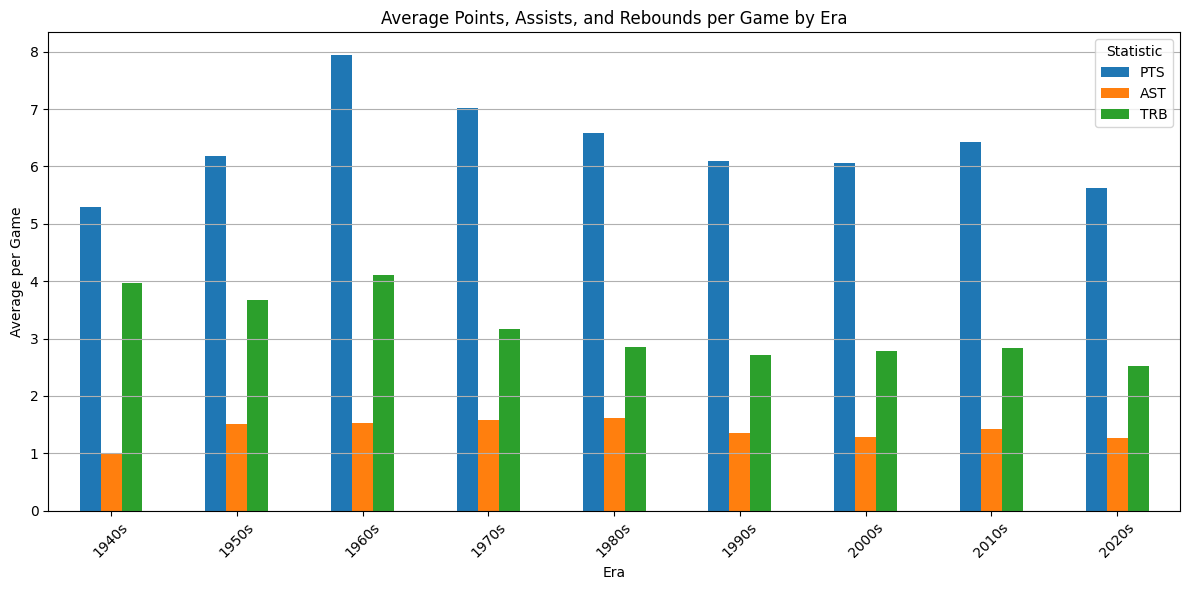

In [ ]:
era_stats = df.groupby('Era')[['PTS', 'AST', 'TRB']].mean().sort_index()

era_stats.plot(kind='bar', figsize=(12, 6))
plt.title('Average Points, Assists, and Rebounds per Game by Era')
plt.ylabel('Average per Game')
plt.xlabel('Era')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Statistic')
plt.tight_layout()
plt.show()

Observation: Scoring peaked for players debuting in the 1960s, with earlier decades also showing higher rebound counts — possibly due to lower shooting efficiency and more missed shots. Assists trended slightly upward in recent eras.

### Hypothesis Test: 1960s vs 2010s Scoring

We tested whether scoring in the 1960s was significantly higher than in the 2010s using a Welch’s two-sample t-test:

In [ ]:
pts_60s = df[df['Era'] == '1960s']['PTS'].dropna()
pts_10s = df[df['Era'] == '2010s']['PTS'].dropna()

t_stat, p_value = ttest_ind(pts_60s, pts_10s, equal_var=False)
display(t_stat)
display(p_value)

np.float64(5.128798924225734)

np.float64(3.527833660859907e-07)

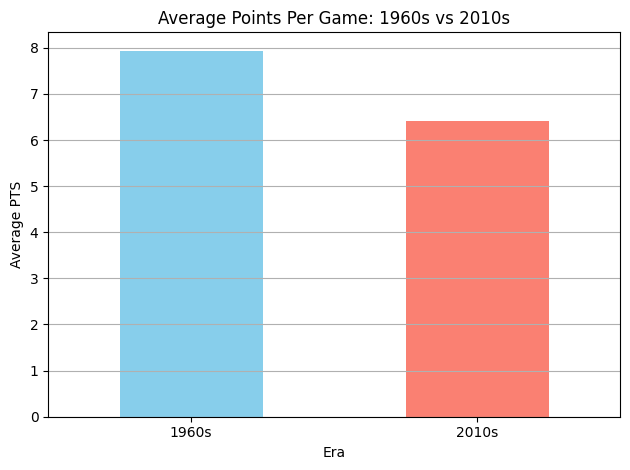

In [ ]:
filtered_df = df[df['Era'].isin(['1960s', '2010s'])]
mean_pts = filtered_df.groupby('Era')['PTS'].mean()

mean_pts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Average Points Per Game: 1960s vs 2010s")
plt.ylabel("Average PTS")
plt.xlabel("Era")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Result: The t-test revealed a statistically significant difference (p ≈ 3.5e-07), confirming that 1960s players scored more per game than those in the 2010s.

### Correlation: Height vs FT%, PER, and Win Shares

We assessed whether a player's height correlated with performance metrics:

In [ ]:
subset = df[['Height', 'FT%', 'PER', 'WS']].dropna()
correlation = subset.corr(method='pearson')
print(correlation)

          Height       FT%       PER        WS
Height  1.000000 -0.244061  0.102993  0.085744
FT%    -0.244061  1.000000  0.293479  0.203382
PER     0.102993  0.293479  1.000000  0.526456
WS      0.085744  0.203382  0.526456  1.000000


Then visualized the relationship:

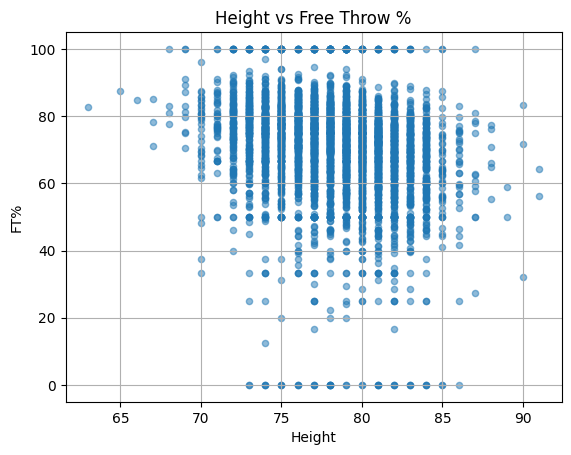

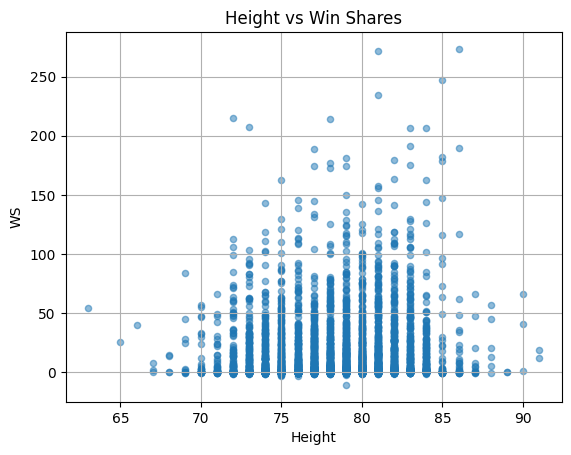

In [ ]:
subset.plot.scatter(x='Height', y='FT%', alpha=0.5)
plt.title("Height vs Free Throw %")
plt.grid(True)
plt.show()

subset.plot.scatter(x='Height', y='WS', alpha=0.5)
plt.title("Height vs Win Shares")
plt.grid(True)
plt.show()

Correlation values were weak (≈ ±0.08), showing almost no linear relationship between height and metrics like FT%, PER, or WS. This suggests that skillset, not height alone, is a stronger driver of individual performance.

### Analyzing Free Throw Percentage

We looked into the three point percentage (FG3%) overtime in the form of eras such as the 80s, 90s, etc.

First we bin the Debut data into eras

In [ ]:
df_era = df[['Debut', 'FG3%']].dropna()
df_era = df_era[df_era['FG3%'] > 0]

bins=[1946, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2025]
labels = ['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']
df_era['Era'] = pd.cut(df_era['Debut'], bins=bins, labels=labels)

df_era

,Debut,FG3%,Era
2,1970,5.6,1970s
3,1991,35.4,1990s
4,1998,23.7,1990s
5,1997,29.7,1990s
9,2017,36.8,2010s
...,...,...,...
5300,2013,28.6,2010s
5303,2001,38.5,2000s
5304,1996,25.0,1990s
5307,2017,33.5,2010s


Then we do a one way ANOVA to see if there is signifance in the difference between FG3% over the eras

In [ ]:
from scipy.stats import f_oneway
groups = []
for era, group in df_era.groupby('Era', observed=True):
  if len(group) > 1:
    groups.append(group['FG3%'].values)

f_stat, p_value = f_oneway(*groups)
print(f_stat, p_value)

20.621471773091756 8.507420036953811e-24


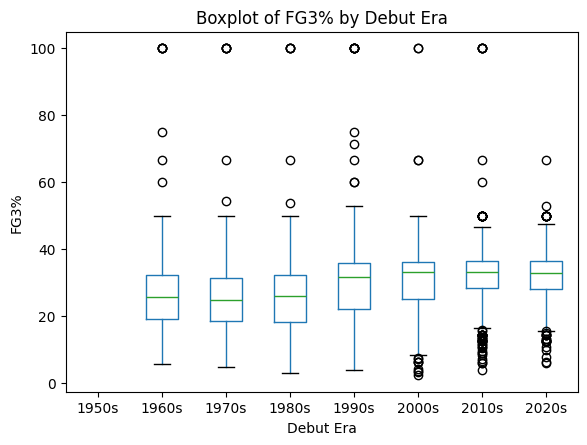

In [ ]:
df_era.boxplot(column='FG3%', by='Era')

plt.title("Boxplot of FG3% by Debut Era")
plt.suptitle("")
plt.xlabel("Debut Era")
plt.ylabel("FG3%")
plt.grid(False)
plt.show()

The f statistic of 20.62 is very large showing that there is at least a variation in FG3% between eras, more than within the ears. And the p-value being so small shows there is statistical significance. This means there is strong evidence of the fact that 3 point percentage has differed between eras.

This is shown as the box plots seem to get smaller and smaller as time goes on, and also go up. This shows us the fact that the skill floor has risen as time has gone on.

## Primary Machine Learning Analysis

First, lets prep the data that we will be using for our ML models.

In [ ]:
df['FG3%'].fillna(0, inplace=True)
if 'Weight' in df.columns and df['Weight'].isnull().any():
    df['Weight'].fillna(df['Weight'].median(), inplace=True)

bucket = [1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
labels = ['1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']
df['Era'] = pd.cut(df['Debut'], bins=bucket, labels=labels, right=False)

#if a player has multiple positions, make it one but if not then just say position is Unknown
df['Primary Position'] = df['Position'].apply(lambda x: x.split('-')[0] if isinstance(x, str) else 'Unknown')

df.dropna(subset=['Debut', 'PTS', 'PER', 'WS', 'Height', 'Weight', 'Era'], inplace=True)

/tmp/ipython-input-27-2895889619.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FG3%'].fillna(0, inplace=True)
/tmp/ipython-input-27-2895889619.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

Next, lets create 4 different ML modeling techniques (Linear regression, K-means clustering, Random forest, Decision Tree Classifier) to help answer our questions from the introduction. Each technique is used differently to help answer each of those questions.

In [ ]:
def run_linear_regression(df):
    print("\nModel 1: Linear Regression to Predict Win Shares (WS)\n")
    features = ['Height', 'Weight']
    target = 'WS'

    X = df[features]
    y = df[target]

    #split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #create model
    model = LinearRegression()

    #train model
    model.fit(X_train, y_train)

    # Interpretation
    print(f"Model Coefficients:")
    for feature, coef in zip(features, model.coef_):
        print(f"{feature}: {coef:.4f}")
    print(f"Intercept: {model.intercept_:.4f}")

    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"\nR-squared on Test Data: {r2:.4f}")

    print("Showcases that a players great physical build does not equal successful metrics like win shares.")

    return X_test, y_test, y_pred

def run_kmeans_clustering(df):
    print("\nModel 2: K-Means Clustering to Identify Player Roles\n")
    df_era = df[df['Era'] == '2020s'].copy()

    features_for_clustering = ['PTS', 'TRB', 'AST', 'FG3%', 'PER']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_era[features_for_clustering])

    kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
    df_era['Cluster'] = kmeans.fit_predict(X_scaled)

    print("Cluster Centers (representing player roles in the 2020s):")
    cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
    cluster_df = pd.DataFrame(cluster_centers, columns=features_for_clustering)
    print(cluster_df.round(2))
    print("\nInterpretation of Clusters:")
    print("A cluster with high PTS and FG3% can be a 'Spot-up Shooter'.")
    print("A cluster with high TRB and PER can be a 'Dominant Big in the Paint'.")
    print("A cluster with high AST can be a 'Playmaker'.")

    print("\nThis can be used to track which roles came to light or died out in different eras.")

    return df_era


def run_random_forest(df):
    print("\nModel 3: Random Forest to Predict Player Efficiency Rating (PER) using their height, weight, and year of their debut\n")
    features = ['Height', 'Weight', 'Debut']
    target = 'PER'

    X = df[features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"R2 score: {r2:.4f}")

    importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
    print("\nFeature Importances:")
    print(importances)

    print("The 'Debut' year is the most important feature as it showcases the potential career they will have during that era compared to their physical stats.")

def run_decision_tree_classifier(df):
    print("\nModel 4: Decision Tree Classifier to Predict Hall of Fame (HOF) Status\n")

    df_hof = df[df['Final'] < 2015].copy()
    df_hof['HOF'] = df_hof['HOF'].astype(bool)

    features = ['PTS', 'TRB', 'AST', 'PER', 'WS']
    target = 'HOF'

    X = df_hof[features]
    y = df_hof[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

    model = DecisionTreeClassifier(max_depth=4, random_state=42, class_weight='balanced')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Not HOF', 'HOF']))

    print("Uses a decision tree based on a players stats to see if they would make the HOF.")


In [ ]:
rlx_test, rly_test, rly_pred = run_linear_regression(df)
df_era = run_kmeans_clustering(df)
run_random_forest(df)
run_decision_tree_classifier(df)


Model 1: Linear Regression to Predict Win Shares (WS)

Model Coefficients:
Height: 0.2627
Weight: 0.0608
Intercept: -18.9273

R-squared on Test Data: 0.0073
Showcases that a players great physical build does not equal successful metrics like win shares.

Model 2: K-Means Clustering to Identify Player Roles

Cluster Centers (representing player roles in the 2020s):
     PTS   TRB   AST   FG3%    PER
0   0.92  0.87  0.32   3.82  -0.45
1  16.02  4.91  4.56  33.56  15.54
2   4.69  3.75  0.59   4.28  18.11
3   8.79  3.88  1.76  33.53  12.87
4   3.73  1.59  0.88  32.04  10.16

Interpretation of Clusters:
A cluster with high PTS and FG3% can be a 'Spot-up Shooter'.
A cluster with high TRB and PER can be a 'Dominant Big in the Paint'.
A cluster with high AST can be a 'Playmaker'.

This can be used to track which roles came to light or died out in different eras.

Model 3: Random Forest to Predict Player Efficiency Rating (PER) using their height, weight, and year of their debut

R2 score: -0.

## Visualization

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

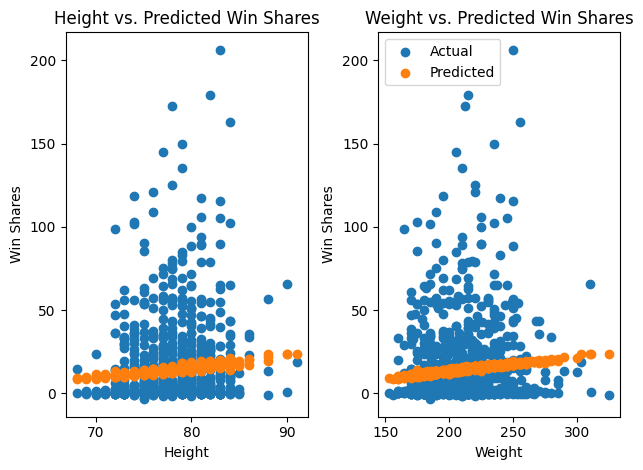

In [ ]:
import seaborn as sns

#Let's plot the results from the Linear Regression Model

plt.subplot(1, 2, 1)
plt.scatter(rlx_test['Height'], rly_test, label='Actual')
plt.scatter(rlx_test['Height'], rly_pred,label='Predicted')
plt.xlabel('Height')
plt.ylabel('Win Shares')
plt.title('Height vs. Predicted Win Shares')
plt.subplot(1, 2, 2)
plt.scatter(rlx_test['Weight'], rly_test, label='Actual')
plt.scatter(rlx_test['Weight'], rly_pred, label='Predicted')
plt.xlabel('Weight')
plt.ylabel('Win Shares')
plt.title('Weight vs. Predicted Win Shares')
plt.legend()
plt.tight_layout()
plt

As you can see, a player's build (heigh and weight) don't predict Win Share performance, more factors are in play.

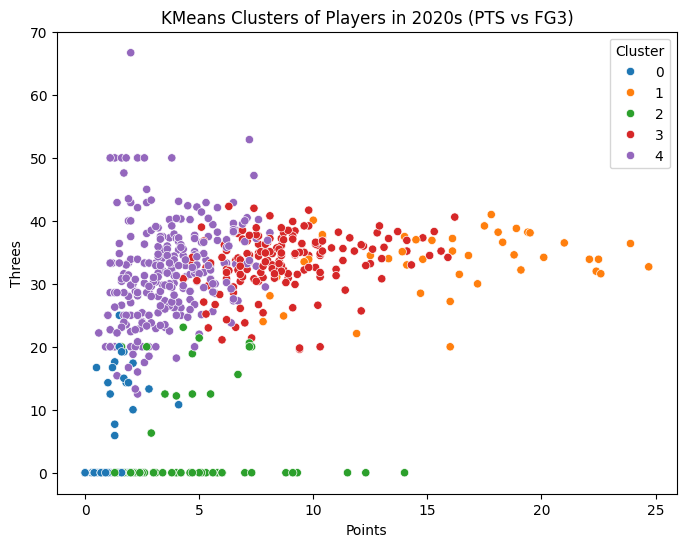

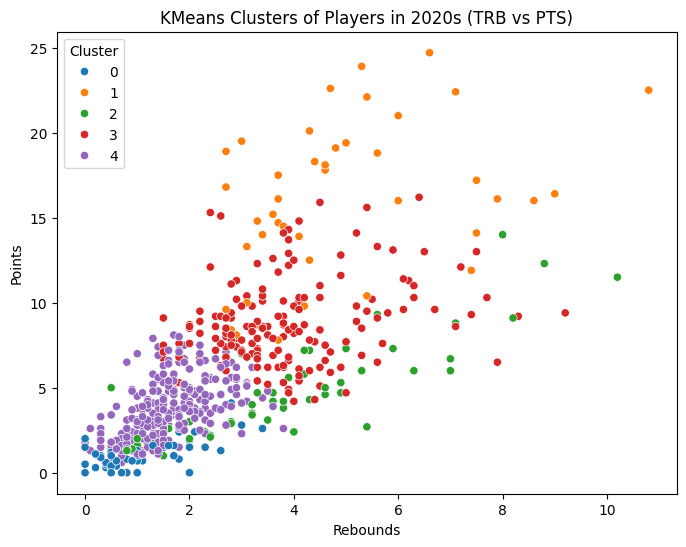

In [ ]:
#Now let's plot the results from the K means
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_era, x='PTS', y='FG3%', hue='Cluster', palette='tab10')
plt.title('KMeans Clusters of Players in 2020s (PTS vs FG3)')
plt.xlabel('Points')
plt.ylabel('Threes')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_era, x='TRB', y='PTS', hue='Cluster', palette='tab10')
plt.title('KMeans Clusters of Players in 2020s (TRB vs PTS)')
plt.xlabel('Rebounds')
plt.ylabel('Points')
plt.legend(title='Cluster')
plt.show()

As described previously:


The cluster with high PTS and FG3%, as seen in the plot, Cluster 1 and a little but of Cluster 3, can be a 'Spot-up Shooter'. Spot-up shooters are players who excel and recieving a pass and shooting immediately, which would explain their high Points and threes.


The cluster with high TRB and PER can be a 'Dominant Big in the Paint'. Cluster 1 (the far right) shows this role, these players are usually centers or forwards and are best at rebounding and scoring.

## Insights and Conclusions

### Linear Regression
The low R squared shows us that physical statistics are poor predictors of success in the game.
Height and weight have a minimal impact on a player's performance.
Reinforces that the game requires more things such as thinking, dribble skill, speed.


### K-Means
The Clusters help us visualize different roles and playstyles given a player's stats. For sake of brevity the plots only show 2020s but if an individual were to plot other eras, we could see how these roles developed and passed.


### Random Forest
The Debut year being the most import feature tells us a few things. This indicates that the era a player started signifcantly impacted their performance. Newer eras may have higher performance ratings due to the changing playstyle, better training, and the overall increase in the skill floor of the game.


### Decision Tree
The low precision for HOF is likely due to the fact that aren't many HOF players in the data. This upholds the idea that being in the HOF is more than just raw statistics. Other factors are taken into play such as championships or even the dominance of the player in their era. An old player could be HOF and have poor stats when comparing to a modern non-HOF player. Further showing us the increase in the skill floor.


### Conclusions
We can see that physical traits are not as important as one would think. An average person with limited knowledge would logically assume height is a big factor but that's not so. But, with statistics, we are able to determine a player's "role" as some roles have higher/lower statistics. However, we aren't able to determine the HOF players with just the given statistics as HOF requires other, more "macro" factors such as dominance in the league at the time. Overall, we can see how the game has changed and evolved over time, showing the increase in certain statistics and changes in playstyles/roles.